# **Milestone** | NYC Public High School Data Analysis

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/NYC_DOE_Logo.png" alt="NYC DOE Logo" width="300"/>
</div>


# Introduction
For this Milestone, you’re joining the New York City Department of Education as a data analyst intern. Your first assignment is to explore a dataset containing recent information on NYC public high schools, including enrollment numbers, demographics, and socioeconomic indicators.

Your goal is to better understand the landscape of public high school education in NYC by analyzing key metrics such as total enrollment, percentage of students with disabilities, English learners, and students living in poverty. By visualizing these variables and investigating potential relationships between them, you’ll help uncover patterns and raise important questions that could inform future policy decisions.

Your work here lays the foundation for data-driven improvements in educational equity, resource allocation, and student support across the city’s schools.


To start, import both the pandas library and the plotly.express library.

In [2]:
# Import libraries here
# import pands
import pandas as pd
# import plotly
import plotly.express as px

# Task 1: Explore the dataset

You will use the `schools.csv` dataset to complete your analysis. Each row gives data for a particular school in New York City.


The `schools` dataset contains the following information:
- **school_name**: Name of the school
- **total_enrollment**: Number of students enrolled
- **percent_students_with_disabilities**: Percentage of students with disabilities
- **percent_english_learners**: Percentage of students who speak English as a second language (ESL)
- **percent_poverty**: Percentage of students who are below the poverty line


Load the dataset into a DataFrame and randomly preview 10 rows.

In [3]:
# Load the data
school_demog_df = pd.read_csv("datasets/schools.csv")
# Preview 10 randomly chosen rows
school_demog_df.head(10)

,school_name,total_enrollment,percent_students_with_disabilities,percent_english_learners,percent_poverty
0,47 The American Sign Language and English Seco...,176.6,27.56,6.12,86.08
1,A. Philip Randolph Campus High School,1394.8,13.20,9.94,83.70
2,A.C.E. Academy for Scholars at the Geraldine F...,469.8,10.30,8.18,65.50
3,ACORN Community High School,391.0,27.08,4.16,83.88
4,Abraham Lincoln High School,2161.8,15.48,15.88,72.00
5,Academic Leadership Charter School,488.0,11.24,11.86,94.02
6,Academy For Personal Leadership And Excellence,464.6,24.16,33.46,94.98
7,Academy for Careers in Television and Film,528.0,19.44,2.14,61.94
8,Academy for College Preparation and Career Exp...,464.4,17.26,9.04,80.68
9,Academy for Conservation and the Environment,290.0,20.76,9.12,80.84


In [4]:
# List the columns of the DataFrame
print(school_demog_df.columns)

Index(['school_name', 'total_enrollment', 'percent_students_with_disabilities',
       'percent_english_learners', 'percent_poverty'],
      dtype='object')


In [5]:
# How many schools are in New York City?
# In other words, what is the size ("shape") of the dataframe?
rows = school_demog_df.shape[0]

print(f"Number of schools in New York:\t{rows:,.0f} schools")

Number of schools in New York:	1,834 schools


In [6]:
# What kinds of data are in each column? Are there any missing values?
# The df lists the school name, and then total enrollment and various hardships as floating-point numbers.
# The following integrated function shows that there are not missing values amongst any schools.
school_demog_df.isna().sum()

school_name                           0
total_enrollment                      0
percent_students_with_disabilities    0
percent_english_learners              0
percent_poverty                       0
dtype: int64

In [7]:
# View the statistical summary of the DataFrame
school_demog_df.describe()

,total_enrollment,percent_students_with_disabilities,percent_english_learners,percent_poverty
count,1834.000000,1834.000000,1834.000000,1834.000000
mean,588.309481,21.944242,13.284084,75.030873
std,481.135549,15.793045,13.986404,19.179663
min,12.000000,0.000000,0.000000,3.950000
25%,313.250000,14.963750,4.120000,68.065000
50%,476.700000,19.340000,9.070000,79.680000
75%,694.950000,24.415000,17.785000,88.580000
max,5591.800000,100.000000,99.600000,99.380000


When looking at statistical summaries of the data, pay attention to the mean and the median (50th percentile) of each column. If the two values are very different, this may be something to look into.

Do the mean and the median vary significantly in any of the columns?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> The mean percent_poverty for a high school in NYC is 75%, the median is almost 80%, and the standard deviation is 19%.How do I interpret the distribution of poverty levels across schools? Is the difference between the mean and median significant? Does it fall within an expected range given the high standard deviation?
  </span>
</div>

Because the standard deviation is 19%+, and the median and mean are within 5% of each other, this indicates that the variance of the school data is skewed from a much lower number of lower-poverty schools, but a much lower percentage of poverty. That is, most schools are close to or around the 80% poverty rate. However, some schools (not a majority), go as low as 3.95%, while others go higher than 80% up to 99.38% poverty population.
Having the median and mean so close together is a good indicator that the average school falls within this bracket ~(75 - 80)%. However, a standard deviation of 19%, on a scale of (0 - 100)% shows that there are some strong pulls from the schools with lower percentages, and rightly so. The school with the lowest poverty percentage is just 5% total of the median poverty percentage.

#Task 2: Explore the dataset ... visually

Visualization is one of the most powerful ways to understand your data at a glance. It allows you to quickly spot trends, distributions, and outliers that might be hidden in raw numbers. In this task, you'll use histograms to better understand the characteristics of NYC public high schools.

<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      <span style="font-family: monospace; color: #222;">px.histogram</span> is the workhorse of the <span style="font-family: monospace; color: #222;">plotly</span> library. It will be the most used function in our tool box, especially as you're familiarizing yourself with a dataset!
  </span>
</div>

### Task 2a: Total Enrollment
**1.** Create a histogram to explore how student enrollment is distributed across schools. You'll need to answer the questions that follow.

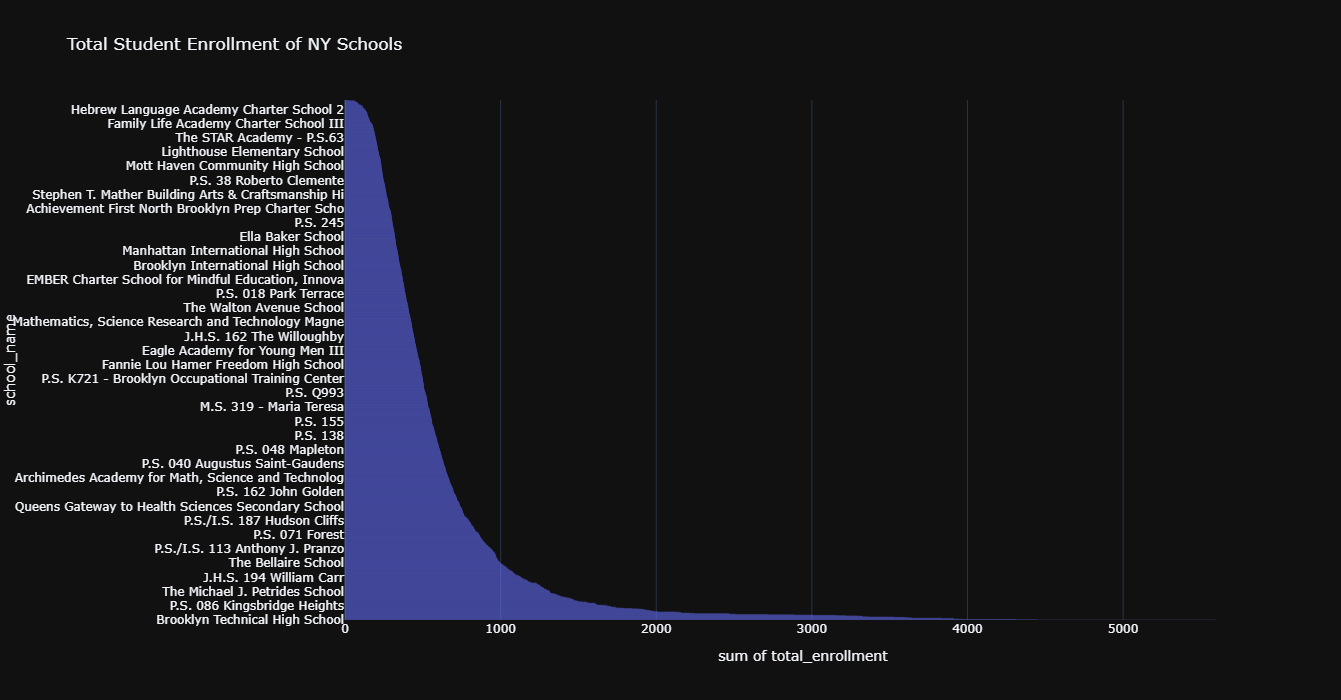

In [12]:
# Plot the distribution of total student enrollment
total_enroll_graph = px.histogram(school_demog_df,
                                  y = "school_name",
                                  x = "total_enrollment",
                                  title = "Total Student Enrollment of NY Schools")

total_enroll_graph.update_layout(yaxis_categoryorder = "total descending",
                                 template = "plotly_dark",
                                 height = 700,
                                 width = 1000)

**2.** What is the most typical school size in terms of student enrollment?

Looking at the median, we can see there is a typical school size of 477 students. Averages/means are more prone to being affected by outliers.

**3.** Are there any outliers? Remember that outliers are values that are "far away" from a tyical value!

Brooklyn Technical High School has a student population of more than 5,500 students. This is almost 1200% more than the median.
New York Center for Autism Charter School Bronx has a student population of 13 students. This is almost 98% less than the median.

**4.** Could outliers (if any) indicate the existence of specialized schools for students with disabilities? Don't be afraid to use ChatGPT to help you in your response!

Not necessarily given the area of where these schools are- the entire state of New York. This means that the outliers could vary wildly. For instance, a small student population size could be because of (a) special needs wanting smaller and more personal class sizes, (b) school with low funding nto able to afford more studetns, (c) located in a rural area with less civilian population, (d) an expensive private school built on small class sizes, or a number of other possibilities.

### Task 2b: Students with Disabilities
**1.** Create a histogram to view the distribution of the percentage of students with disabilities across the schools. You'll need to answer the questions that follow.

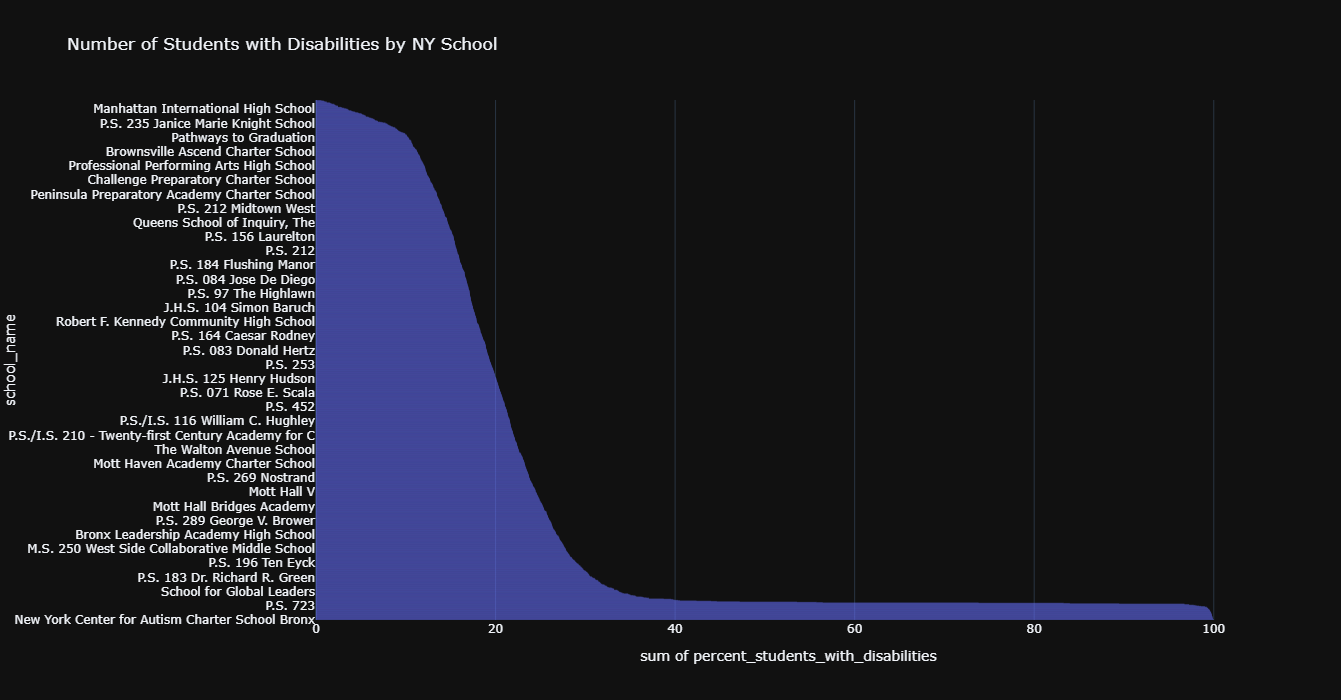

In [15]:
# Plot the distribution of the % of students with disabilities in schools
total_disabilities_graph = px.histogram(school_demog_df,
                                  y = "school_name",
                                  x = "percent_students_with_disabilities",
                                  title = "Number of Students with Disabilities by NY School")

total_disabilities_graph.update_layout(yaxis_categoryorder = "total descending",
                                       template = "plotly_dark",
                                       height = 700,
                                       width = 1000)

**2.** Are most schools clustered around a certain percentage?

Based on the graph above, it appears that most most schools hover around 20% of the student population has a disability(ies).


**3.** Are there any outliers in your data? What might those outliers mean?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How should I interpret a school with 100% students with disabilities?
  </span>
</div>

There are several schools that are near-100%. This would mean that they're specialized schools that only treat students with disabilities. Others, even those with 30% or more, could indicate these are general schools that have a special needs program. Such as, the demand for schools offering autism-related teaching, has been rising in the last decade. 

#### Task 2c: English Learners
**1.** Create a histogram to view the distribution of the percentage of students who are learning English as a second language in NYC’s public high schools. You'll need to answer the questions that follow.

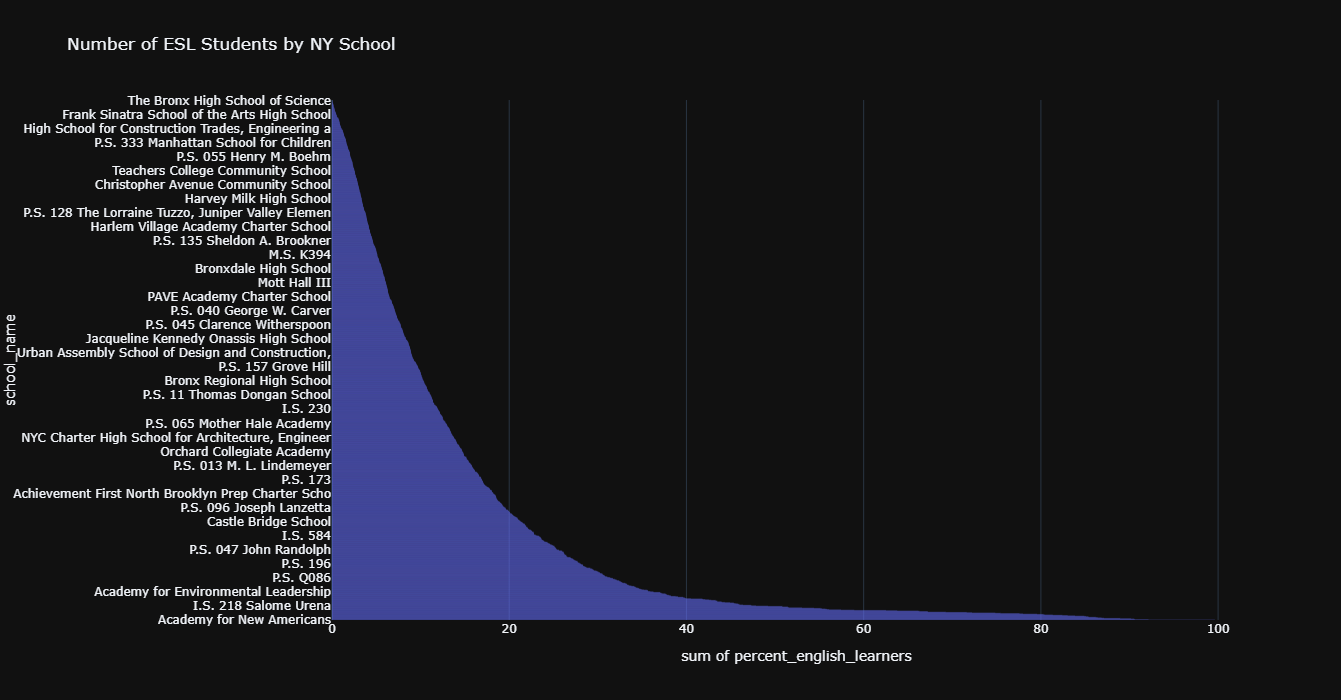

In [16]:
# Plot the distribution of the % of students who are learning English as a second language in schools
total_esl_graph = px.histogram(school_demog_df,
                                  y = "school_name",
                                  x = "percent_english_learners",
                                  title = "Number of ESL Students by NY School")

total_esl_graph.update_layout(yaxis_categoryorder = "total descending",
                                       template = "plotly_dark",
                                       height = 700,
                                       width = 1000)

**2.** Are there many schools with high percentages of English learners?

No, a majority of schools have ~20% or less of students that are English learners.

**3.** Are there outliers? What could these outliers indicate about particular schools?

The schools with a smaller percentage of English-learning students could indicate that they are either in rural areas, i.e. away from metropolitan areas where the demographic is much more varied, or it could also indicate that some of these schools with less students are private schools, particularly religious schools. There are a large number of Catholic schools that require students to speak English.
The schools with a large percentage of English-learning students could also be schools that are specialized towards non-English-native students.

#### Task 2d: Students in Poverty
**1.** Create a histogram to view the distribution of the percentage of students whose families fall below the poverty line in NYC public high schools.

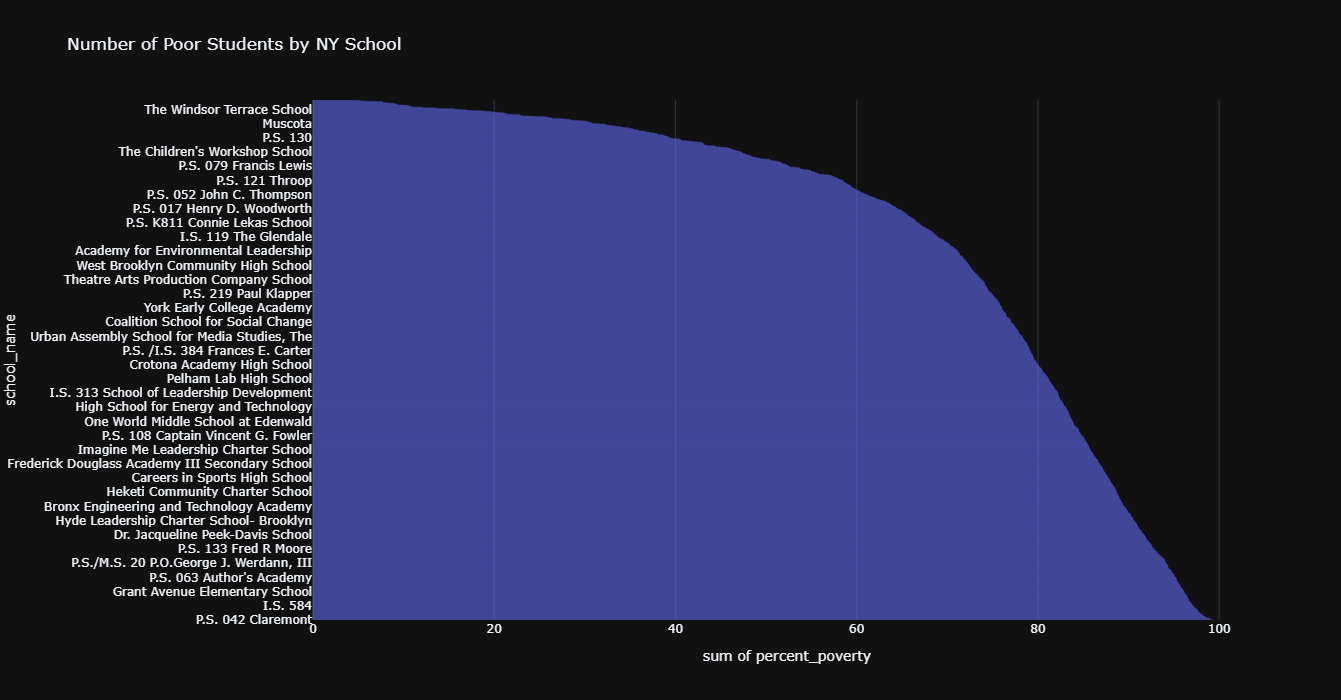

In [17]:
# Plot the distribution of the % of students whose families are below the poverty line in schools
total_poor_graph = px.histogram(school_demog_df,
                                  y = "school_name",
                                  x = "percent_poverty",
                                  title = "Number of Poor Students by NY School")

total_poor_graph.update_layout(yaxis_categoryorder = "total descending",
                                       template = "plotly_dark",
                                       height = 700,
                                       width = 1000)

**2.** Based on these four histograms, what are the typical characteristics of an average NYC public high school in terms of enrollment, student disabilities, English learners, and the percentage of students living below the poverty line?









Most schools can see roughly 400-500 students total enrolled, with 20% being students with disabilities, 10% being students that are learning English, and near-80% of students whose families fall below the poverty line.

#### Task 2e: A Relationship Between Poverty and English Language Learners

By plotting these two variables, we aim to see if there is a *correlation* between high poverty rates and a higher proportion of students learning English as a second language. This can help identify trends, such as whether schools in more impoverished areas tend to serve a higher percentage of students who are learning English as a second language.

**1.** Create a scatter plot with the poverty rate on the x-axis and the percentage of English learners on the y-axis.



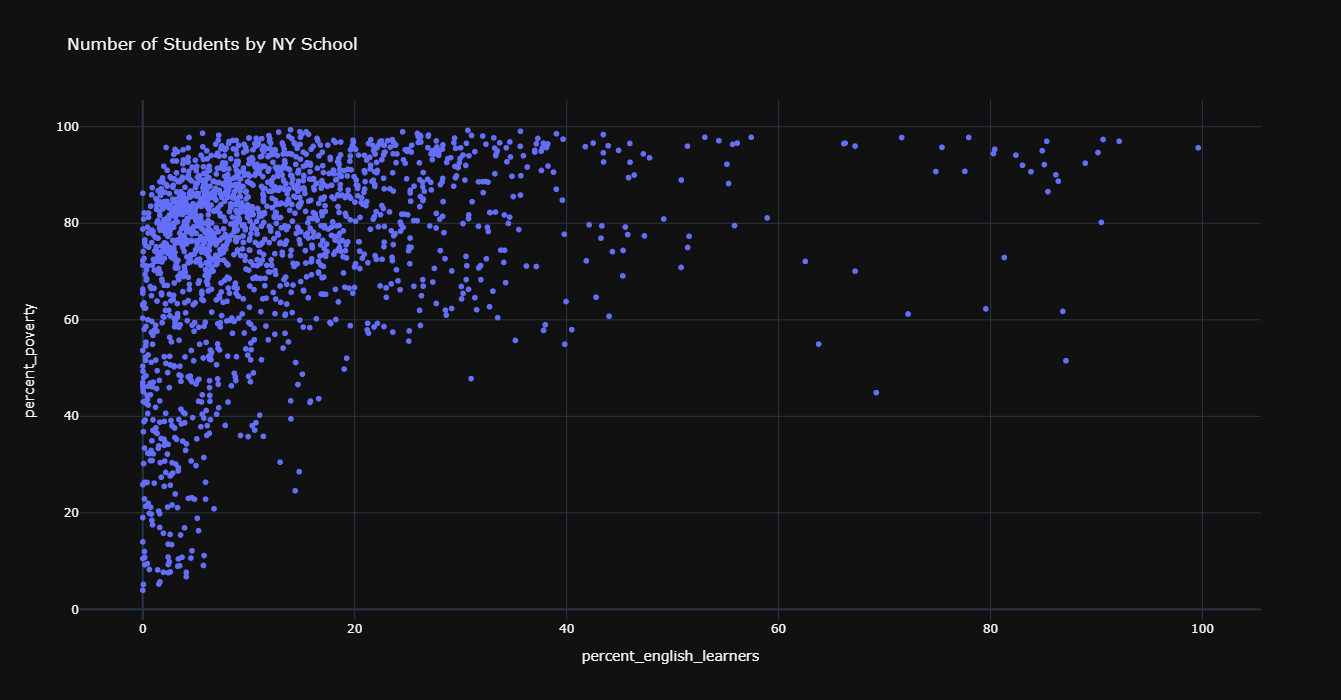

In [22]:
# Create a scatter plot of percent_english_learners vs percent_poverty
total_graph = px.scatter(school_demog_df,
                         x = "percent_english_learners",
                         y = "percent_poverty",
                         title = "Number of Students by NY School")

total_graph.update_layout(template = "plotly_dark",
                          height = 700,
                          width = 1000)

**2.** Is there any visible relationship between the two variables? Do schools with higher poverty rates tend to have more students learning English as a second language?

It would appear as though the majority of schools that have a large population of students whose families fall below the poverty line, are mostly English speaking. At the same time the schools with a larger number of English-learning students majorily have more impoverished students.



**3.** Looking at the scatter plot, what do you think the relationship between poverty and English learners could mean for resource allocation in schools? What implications might this have for educators and policymakers in addressing the needs of these students?

This is a clear indicator that schools need more resources for students that don't necessarily speak English, or are learning English. Personally, we had a huge array of available resources in more than six languages available for students and parents in the Dallas Independent School District. At the same time, this may be affected since schools and public facilities are no longer legally required to accomodate civilians that don't speak English.

# LevelUp

Congratulations on completing the Milestone! In the last visualization, you created scatter plots to visually inspect whether a relationship might exist between variables.

There is a way to **quantify** the relationship between *any* two variables! It is called **correlation**. Correlation ranges from -1 to 1.

When the correlation between two variables is equal to 1, this means that there is a perfect relationship between them. Two variables that would be (almost!) perfectly correlated are `age` and `birth_year`. If you know someone's year of birth, you can predict their age. If you know their age, you can predict their birth year.

When the correlation between two variables is equal to 0, this means that there is no relationship between two variables. For example, `shoe_size` and `favorite_color`. These two variables are not related in any meaningful way.

A negative correlation means that an increase in one variable leads to a decrease in the other. For example, `sea_level` and `temperature`. As you climb a mountain, increasing your height above sea level, it gets colder. The temperature decreases.

Pandas offers a quick way to examine the correlation between variables at a single glance: the `.corr()` method applied to a DataFrame. The `.corr()` method will produce a table of correlation coefficients: each row/column intersection is the correlation between the variable named in the row and the variable named in the column.

## Task 3: Correlated Variables

#### Apply the .corr() method to your DataFrame containing the NYC Department of Education data.

Examine the table and determine **which two variables have the strongest correlation, and how strong that correlation is.**

Here's a rough guide to understanding correlation coefficients:
- Correlation between 0 and 0.2 is considered to be non-existent to weak.
- Correlation between 0.2 and 0.4 is considered weak.
- Correlation between 0.4 and 0.6 is considered moderate.
- Correlation between 0.6 and 0.8 is considered to be strong.
- Correlation between 0.8 and 1 is considered to be very strong.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>A variable will always be perfectly correlated with itself! So disregard the diagonal of your output when answering this question!
</span>
</div>

In [25]:
# Apply the .corr() method to the dataframe
school_demog_df.corr()

,total_enrollment,percent_students_with_disabilities,percent_english_learners,percent_poverty
total_enrollment,1.000000,-0.176817,0.027771,-0.143091
percent_students_with_disabilities,-0.176817,1.000000,0.020820,0.079578
percent_english_learners,0.027771,0.020820,1.000000,0.315477
percent_poverty,-0.143091,0.079578,0.315477,1.000000


The strongest correlation is 0.32 and is between the variables percent_poverty and percent_english_learners.